In [1]:
%matplotlib notebook

In [2]:
import requests

In [3]:
from ztfquery import tools, metasearch, query

# The main query object `ZTFQuery`

Load it

In [4]:
zquery = query.ZTFQuery()

Define the query you want. This will set the `metaquery` attribute as well as the derived `metadata`.

#### Example of query:
   - Science object with target within 0.3 degree from the coord 354,23:
      ```
      zquery.load_metadata(kind="sci", radec=[354,23], size=0.3)
      ```

   - Science object for 14th ccd with airmass higher than 2
      ```
      zquery.load_metadata(kind="sci", sql_query="ccdid=14 AND airmass>2")
      ```
      
      ---
      
      
#### See all the queriable for using:
```
from ztfquery.metaseach import get_queriable_field
print(get_queriable_field("sci", fulltable=True))
```
(change `"sci"` by `cal` for calibration [bias and highresflat] ; `raw` for raw images ; `ref` for reference images)

#### Case used in this tutorial:

Science images as part as field 600 observed in the "g" band, only taking the quadrant 2 of the ccd 8
```
zquery.load_metadata(kind="sci", sql_query="field=14 AND filtercode='zg'")
```


In [13]:
zquery.load_metadata(kind="sci", sql_query="field=600 AND filtercode='zg' AND ccdid=8 AND qid=2")

Let's see how the `metadata` look like

In [14]:
zquery.metatable

,ra,dec,infobits,field,ccdid,qid,rcid,fid,filtercode,pid,...,ra1,dec1,ra2,dec2,ra3,dec3,ra4,dec4,ipac_pub_date,ipac_gid
0,357.388660,25.586679,0,600,8,2,29,1,zg,365149962915,...,357.855270,26.031513,356.894318,26.005901,356.925622,25.140438,357.879763,25.165537,NaN,-1
1,357.387988,25.584348,0,600,8,2,29,1,zg,365172892915,...,357.854626,26.029217,356.893629,26.003572,356.924926,25.138093,357.879098,25.163207,NaN,-1
2,357.387344,25.586980,48,600,8,2,29,1,zg,366132092915,...,357.854029,26.031733,356.893040,26.006280,356.924241,25.140766,357.878365,25.165787,NaN,-1
3,357.385047,25.591509,0,600,8,2,29,1,zg,353110032915,...,357.851608,26.036398,356.890654,26.010730,356.922060,25.145231,357.876219,25.170378,NaN,-1
4,357.386360,25.590797,0,600,8,2,29,1,zg,365109052915,...,357.853004,26.035581,356.892080,26.010101,356.923305,25.144626,357.877398,25.169595,NaN,-1
5,357.384281,25.592361,0,600,8,2,29,1,zg,365080532915,...,357.850877,26.037164,356.889972,26.011629,356.921259,25.146163,357.875365,25.171182,NaN,-1
6,357.385457,25.591917,0,600,8,2,29,1,zg,361078212915,...,357.852083,26.036713,356.891174,26.011190,356.922421,25.145715,357.876540,25.170713,NaN,-1
7,357.385683,25.592266,0,600,8,2,29,1,zg,365089422915,...,357.852318,26.037031,356.891406,26.011565,356.922630,25.146082,357.876725,25.171056,NaN,-1
8,357.388759,25.582683,1,600,8,2,29,1,zg,366173312915,...,357.855404,26.027567,356.894408,26.001920,356.925692,25.136369,357.879877,25.161552,NaN,-1
9,357.388594,25.590715,0,600,8,2,29,1,zg,361109172915,...,357.855135,26.035561,356.894259,26.009960,356.925600,25.144481,357.879675,25.169571,NaN,-1


# Downloading the associated data

### What kind of data do you want ; the `suffix`
Except for Calibrations, there are several data product you can get associated to each images. These have different `suffix`.

For instance, in the case of science images (`kind='sci'`) these are the available suffixes:

- "sciimg.fits":"(primary science image)",
- "mskimg.fits":"(bit-mask image)",
- "psfcat.fits":"(PSF-fit photometry catalog)",
- "sexcat.fits":"(nested-aperture photometry catalog)",
- "sciimgdao.psf":"(spatially varying PSF estimate in DAOPhot's lookup table format)",
- "sciimgdaopsfcent.fits":"(PSF estimate at science image center as a FITS image)",
- "sciimlog.txt":"(log output from instrumental calibration pipeline)",
- "scimrefdiffimg.fits.fz":"(difference image: science minus reference; fpack-compressed)",
- "diffimgpsf.fits":"(PSF estimate for difference image as a FITS image)",
- "diffimlog.txt":"(log output from image subtraction and extraction pipeline)",
- "log.txt":"(overall system summary log from realtime pipeline)"
                      
_By default for a `sci` query `suffix` is set to `sciimg.fits`._

### Getting Data Path/URL

To get the data from IPAC, we will need to build an URL. The method `get_data_path` is made to build the URL.


In [15]:
zquery.get_data_path(suffix="sciimg.fits")

['https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0101/149954/ztf_20180101149954_000600_zg_c08_o_q2_sciimg.fits',
 'https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0101/172894/ztf_20180101172894_000600_zg_c08_o_q2_sciimg.fits',
 'https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0102/132083/ztf_20180102132083_000600_zg_c08_o_q2_sciimg.fits',
 'https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2017/1220/110023/ztf_20171220110023_000600_zg_c08_o_q2_sciimg.fits',
 'https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0101/109051/ztf_20180101109051_000600_zg_c08_o_q2_sciimg.fits',
 'https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0101/080521/ztf_20180101080521_000600_zg_c08_o_q2_sciimg.fits',
 'https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2017/1228/078218/ztf_20171228078218_000600_zg_c08_o_q2_sciimg.fits',
 'https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0101/089421/ztf_20180101089421_000600_zg_c08_o_q

### Actual Downloading

The method `download_data` calls `get_data_path` and does the actual downloading in you computer. 

You can provide a directory for the downloading with the `download_dir` option. If nothing is given, it will create a structure similar to the one at IPAC. Otherwise this will dump everything in the given directory.


**${ZTFDATA}**: If you do not provide a downloading directory, this IPAC directory structure will be build from a root defined by the _global variable_ `ZTFDATA`. Set it within your profile (~/.bash_profile ; ~/.profile ~/.cshrc depending on your OS)

In [20]:
zquery.download_data(suffix="psfcat.fits", notebook=True, show_progress=False)

https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0101/149954/ztf_20180101149954_000600_zg_c08_o_q2_psfcat.fits
https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0101/172894/ztf_20180101172894_000600_zg_c08_o_q2_psfcat.fits
https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0102/132083/ztf_20180102132083_000600_zg_c08_o_q2_psfcat.fits
https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2017/1220/110023/ztf_20171220110023_000600_zg_c08_o_q2_psfcat.fits
https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0101/109051/ztf_20180101109051_000600_zg_c08_o_q2_psfcat.fits
https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0101/080521/ztf_20180101080521_000600_zg_c08_o_q2_psfcat.fits
https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2017/1228/078218/ztf_20171228078218_000600_zg_c08_o_q2_psfcat.fits
https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2018/0101/089421/ztf_20180101089421_000600_zg_c08_o_q2_psfcat.fits
https://irsa.ipa

In [6]:
urls[0]

'https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2017/1028/286192/ztf_20171028286192_000600_zr_c12_o_q4_sciimg.fits'

In [7]:
locations[0]

'/Users/mrigault/Data/ZTF/sci/2017/1028/286192/ztf_20171028286192_000600_zr_c12_o_q4_sciimg.fits'

In [8]:
from ztfquery import tools

In [9]:
tools.download_single_url(urls[0], locations[0], notebook=True)

A Jupyter Widget

In [7]:
from astropy.utils.data import download_files_in_parallel, download_file

In [15]:
import astrobject

In [17]:
img = astrobject.get_image(locations[0], background=0)

<IPython.core.display.Javascript object>


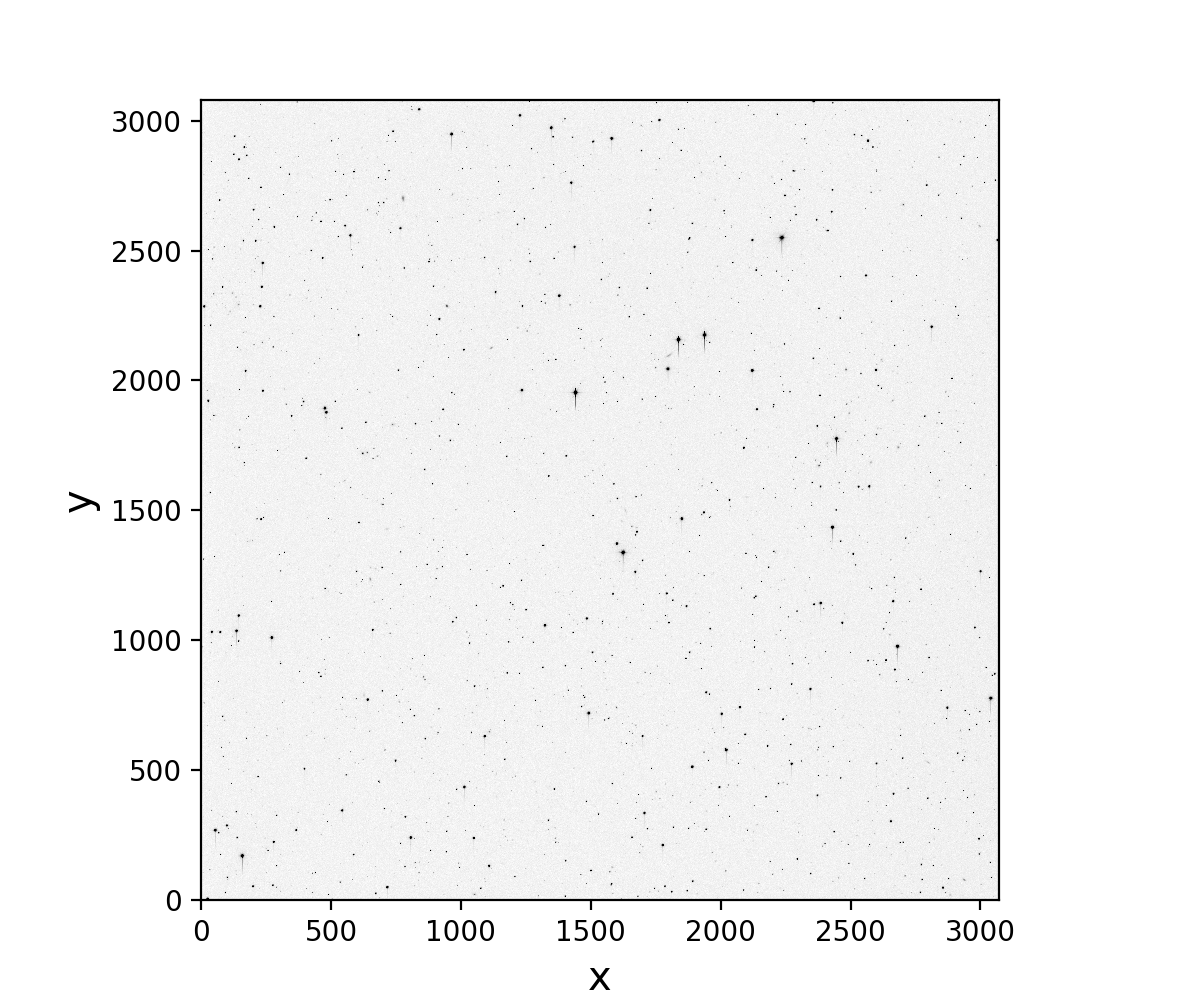

{'ax': <matplotlib.axes._axes.Axes at 0x10d3bc668>,
 'figure': <matplotlib.figure.Figure at 0x14a286b38>,
 'imshow': <matplotlib.image.AxesImage at 0x10d344518>,
 'prop': {'cmap': <matplotlib.colors.LinearSegmentedColormap at 0x10ca6bdd8>,
  'interpolation': 'nearest',
  'origin': 'lower',
  'vmax': 3.061259596605083,
  'vmin': 2.3257779552814206},
 'target_plot': None}

In [23]:
img.show(vmax="99.9", vmin="0.1")

In [25]:
img.header

SIMPLE  =                    T / Created with PDL (http://pdl.perl.org)         
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 3072                                                  
NAXIS2  =                 3080                                                  
BUNIT   = 'Data Value'                                                          
ORIGIN  = 'Zwicky Transient Facility' / Data origin                             
OBSERVER= 'ZTF Robotic Software' / Observer                                     
ROBOSOFT= '0.70-devel October 7, 2017' / Robotic software version               
FITSSOFT= '0.70-devel October 7, 2017' / FITS software version                  
INSTRUME= 'ZTF/MOSAIC'         / Instrument name                                
DETECTOR= '        '           / Detector controller                            
DETSOFT = '        '        